# Classification and Prediction of Peri-Diagnostic Prognoses in Parkinson’s Patients using Machine Learning on Multi-modal Clinical

Faraz Faghri | Sep 07, 2016 

### Goal: 
1. At baseline, determine what are factors that predict clinical progression?
2. What are the sub-types of Parkinson’s disease based on clinical, molecular and imaging data?

### Summary of results:
1. We have identified 3 PD progression sub-types: low, mid, and high which progress at varying rates and also differ at baseline compared to healthy aging
2. We predict PD progression from baseline with 80-98% accuracy by PD subtype
3. We have identified statistically significant elements at baseline which predicts progression: MoCA delayed recall, UPDR3 rigidity, Sleep movement, etc.
4. We have improved the predictions of progression significantly by incorporating various machine learning, approaches as PD is such a heterogenous disease


### Description of Methods Used:
1. We used Gaussian Mixture Models as unsupervised machine learning for identifying PD prognosis subtypes differing at baseline and how they progress
2. Logistic regression as supervised classifier for predicting subtypes and their clinical progression from baseline
3. Randomized decision trees (a.k.a. extra-trees) for identifying important factors at baseline in prediction of clinical progression


## 1. Data load and cleansing

In [23]:
# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## loading data and selecting the necessary columns
## column names
cols = {}
# Biospecimen Analysis
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
# Medical
cols["pd_features"] = ["PATNO", "SXMO","SXYEAR", "PDDXDT"] # first symptom onset month, year, diagnosis date 
cols["pd_medication"] = ["PATNO", "EVENT_ID","PDMEDYN","ONLDOPA", "ONDOPAG", "ONOTHER"] # on medication, Levodopa, Dopamine Agonist, other
cols["vital_sign"] = ["PATNO", "EVENT_ID","WGTKG","HTCM"]
# Medical-Neurological Exam
cols["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# Medical-Safety Monitoring

# Motor Assessments
cols["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
cols["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
cols["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
cols["updrs3_temp"] = ["PATNO", "EVENT_ID", "PAG_NAME", "CMEDTM", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
cols["updrs3"] = ["PATNO", "EVENT_ID", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON"]
cols["updrs4"] = ["PATNO", "EVENT_ID", "NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
cols["schwab"] = ["PATNO", "EVENT_ID", "MSEADLG"]
cols["pase_house"] = ["PATNO", "EVENT_ID", "LTHSWRK", "HVYHSWRK", "HMREPR", "LAWNWRK", "OUTGARDN", "CAREGVR", "WRKVL", "WRKVLHR", "WRKVLACT"]
# Non-motor Assessments
cols["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]
cols["cog_catg"] = ["PATNO", "EVENT_ID", "COGDECLN", "FNCDTCOG", "COGSTATE"]
cols["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
cols["geriatric"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
cols["geriatric_pos"] = [ "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSAFRAD", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSWRTLS", "GDSHOPLS", "GDSBETER"]
cols["geriatric_neg"] = [ "GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
cols["hopkins_verbal"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
cols["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
cols["moca_visuospatial"] = [ "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH"]
cols["moca_naming"] = [ "MCALION", "MCARHINO", "MCACAMEL"]
cols["moca_attention"] = [ "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7"]
cols["moca_language"] = [ "MCASNTNC", "MCAVF"]
cols["moca_delayed_recall"] = [ "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5"]
cols["moca_orientation"] = [ "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY"]
cols["upsit"] = [ "SUBJECT_ID", "SCENT_10_RESPONSE", "SCENT_09_RESPONSE", "SCENT_08_RESPONSE", "SCENT_07_RESPONSE", "SCENT_06_RESPONSE", "SCENT_05_RESPONSE", "SCENT_04_RESPONSE", "SCENT_03_RESPONSE", "SCENT_02_RESPONSE", "SCENT_01_RESPONSE", "SCENT_20_RESPONSE", "SCENT_19_RESPONSE", "SCENT_18_RESPONSE", "SCENT_17_RESPONSE", "SCENT_16_RESPONSE", "SCENT_15_RESPONSE", "SCENT_14_RESPONSE", "SCENT_13_RESPONSE", "SCENT_12_RESPONSE", "SCENT_11_RESPONSE", "SCENT_30_RESPONSE", "SCENT_29_RESPONSE", "SCENT_28_RESPONSE", "SCENT_27_RESPONSE", "SCENT_26_RESPONSE", "SCENT_25_RESPONSE", "SCENT_24_RESPONSE", "SCENT_23_RESPONSE", "SCENT_22_RESPONSE", "SCENT_21_RESPONSE", "SCENT_40_RESPONSE", "SCENT_39_RESPONSE", "SCENT_38_RESPONSE", "SCENT_37_RESPONSE", "SCENT_36_RESPONSE", "SCENT_35_RESPONSE", "SCENT_34_RESPONSE", "SCENT_33_RESPONSE", "SCENT_32_RESPONSE", "SCENT_31_RESPONSE", "SCENT_10_CORRECT", "SCENT_09_CORRECT", "SCENT_08_CORRECT", "SCENT_07_CORRECT", "SCENT_06_CORRECT", "SCENT_05_CORRECT", "SCENT_04_CORRECT", "SCENT_03_CORRECT", "SCENT_02_CORRECT", "SCENT_01_CORRECT", "SCENT_20_CORRECT", "SCENT_19_CORRECT", "SCENT_18_CORRECT", "SCENT_17_CORRECT", "SCENT_16_CORRECT", "SCENT_15_CORRECT", "SCENT_14_CORRECT", "SCENT_13_CORRECT", "SCENT_12_CORRECT", "SCENT_11_CORRECT", "SCENT_30_CORRECT", "SCENT_29_CORRECT", "SCENT_28_CORRECT", "SCENT_27_CORRECT", "SCENT_26_CORRECT", "SCENT_25_CORRECT", "SCENT_24_CORRECT", "SCENT_23_CORRECT", "SCENT_22_CORRECT", "SCENT_21_CORRECT", "SCENT_40_CORRECT", "SCENT_39_CORRECT", "SCENT_38_CORRECT", "SCENT_37_CORRECT", "SCENT_36_CORRECT", "SCENT_35_CORRECT", "SCENT_34_CORRECT", "SCENT_33_CORRECT", "SCENT_32_CORRECT", "SCENT_31_CORRECT", "TOTAL_CORRECT"]
cols["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
cols["rem"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
cols["aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
cols["aut_gastrointestinal_up"] = [ "SCAU1", "SCAU2", "SCAU3" ]
cols["aut_gastrointestinal_down"] = [ "SCAU4", "SCAU5", "SCAU6", "SCAU7" ]
cols["aut_urinary"] = [ "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13" ] 
cols["aut_cardiovascular"] = [  "SCAU14", "SCAU15", "SCAU16" ]
cols["aut_thermoregulatory"] = [ "SCAU17", "SCAU18" ]
cols["aut_pupillomotor"] = [ "SCAU19" ]
cols["aut_skin"] = [ "SCAU20", "SCAU21" ]
cols["aut_sexual"] = [ "SCAU22", "SCAU23", "SCAU24", "SCAU25"] # 9 for NA, might skew the results signific for M/F better to remove
cols["semantic"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
cols["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
cols["stai_a_state_pos"] = ["STAIAD3", "STAIAD4", "STAIAD6", "STAIAD7", "STAIAD9", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD17", "STAIAD18"]
cols["stai_a_state_neg"] = ["STAIAD1", "STAIAD2", "STAIAD5",  "STAIAD8", "STAIAD10", "STAIAD11", "STAIAD15", "STAIAD16", "STAIAD19", "STAIAD20"]
cols["stai_a_trait_pos"] = ["STAIAD22", "STAIAD24", "STAIAD25", "STAIAD28", "STAIAD29", "STAIAD31", "STAIAD32", "STAIAD35", "STAIAD37", "STAIAD38", "STAIAD40"]
cols["stai_a_trait_neg"] = ["STAIAD21", "STAIAD23", "STAIAD26", "STAIAD27", "STAIAD30", "STAIAD33", "STAIAD34", "STAIAD36", "STAIAD39"]
cols["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
cols["upsit_booklet"] = [ "PATNO", "EVENT_ID", "UPSITBK1", "UPSITBK2", "UPSITBK3", "UPSITBK4" ]
# Subject Characteristics
cols["family_history"] = ["PATNO", "BIOMOM", "BIOMOMPD", "BIODAD", "BIODADPD", "FULSIB", "FULSIBPD", "HAFSIB", "HAFSIBPD", "MAGPAR", "MAGPARPD", "PAGPAR", "PAGPARPD", "MATAU", "MATAUPD", "PATAU", "PATAUPD", "KIDSNUM", "KIDSPD"]
cols["status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
cols["screening"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
cols["socio"] = [ "PATNO", "EDUCYRS", "HANDED" ]
# Subject Enrollment
cols["primary_diag"] = [ "PATNO", "PRIMDIAG" ]

## data load
# Biospecimen Analysis
biospecimen = pd.read_csv("../data/2016-05-25 data/Biospecimen Analysis/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], \
                            ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
csf = biospecimen[(biospecimen["TYPE"] == 'Cerebrospinal fluid') & ~(biospecimen["TESTVALUE"] == "below detection limit")][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
hemoglobin = csf[csf["TESTNAME"] == "CSF Hemoglobin"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
alpha_syn = csf[csf["TESTNAME"] == "CSF Alpha-synuclein"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
total_tau = csf[csf["TESTNAME"] == "Total tau"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
abeta_42 = csf[csf["TESTNAME"] == "Abeta 42"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
p_tau181p = csf[csf["TESTNAME"] == "p-Tau181P"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
dna = biospecimen[(biospecimen["TYPE"] == 'DNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
rna = biospecimen[(biospecimen["TYPE"] == 'RNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
plasma = biospecimen[(biospecimen["TYPE"] == 'Plasma')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum = biospecimen[(biospecimen["TYPE"] == 'Serum')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
# Medical
pd_start = pd.read_csv("../data/2016-05-25 data/Medical/PD_Features.csv", index_col=["PATNO"], usecols=cols["pd_features"])
pd_medication = pd.read_csv("../data/2016-05-25 data/Medical/Use_of_PD_Medication.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pd_medication"])
vital_signs = pd.read_csv("../data/2016-05-25 data/Medical/Vital_Signs.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["vital_sign"])
# Medical-Neurological Exam
neuro_cranial = pd.read_csv("../data/2016-05-25 data/Medical-Neurological Exam/Neurological_Exam_-_Cranial_Nerves.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["neuro_cranial"])
# Medical-Safety Monitoring

# Motor Assessments
updrs1 = pd.read_csv("../data/2016-05-25 data/Motor Assessments/MDS_UPDRS_Part_I.csv", index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"], usecols=cols["updrs1"])
updrs1pq = pd.read_csv("../data/2016-05-25 data/Motor Assessments/MDS_UPDRS_Part_I__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs1pq"])
updrs2pq = pd.read_csv("../data/2016-05-25 data/Motor Assessments/MDS_UPDRS_Part_II__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs2pq"])
updrs3_temp = pd.read_csv("../data/2016-05-25 data/Motor Assessments/MDS_UPDRS_Part_III__Post_Dose_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs3_temp"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # before dose
updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # after dose 
updrs4 = pd.read_csv("../data/2016-05-25 data/Motor Assessments/MDS_UPDRS_Part_IV.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs4"])
schwab = pd.read_csv("../data/2016-05-25 data/Motor Assessments/Modified_Schwab_+_England_ADL.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["schwab"])
pase_house = pd.read_csv("../data/2016-05-25 data/Motor Assessments/PASE_-_Household_Activity.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pase_house"])
# Non-motor Assessments
benton = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Benton_Judgment_of_Line_Orientation.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["benton"])
cog_catg = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Cognitive_Categorization.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["cog_catg"])
epworth = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Epworth_Sleepiness_Scale.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["epworth"])
geriatric = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Geriatric_Depression_Scale__Short_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["geriatric"])
geriatric["total_pos"] = geriatric[cols["geriatric_pos"]].sum(axis=1)
geriatric["total_neg"] = geriatric[cols["geriatric_neg"]].sum(axis=1)
geriatric["total"] = geriatric["total_pos"] + 5 - geriatric["total_neg"]
geriatric = geriatric["total"] # drop the rest
hopkins_verbal = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Hopkins_Verbal_Learning_Test.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["hopkins_verbal"])
letter_seq = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Letter_-_Number_Sequencing__PD_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["letter_seq"])
moca = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Montreal_Cognitive_Assessment__MoCA_.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["moca"])
moca["visuospatial"] = moca[cols["moca_visuospatial"]].sum(axis=1)
moca["naming"] = moca[cols["moca_naming"]].sum(axis=1)
moca["attention"] = moca[cols["moca_attention"]].sum(axis=1)
moca["language"] = moca[cols["moca_language"]].sum(axis=1)
moca["delayed_recall"] = moca[cols["moca_delayed_recall"]].sum(axis=1)
moca = moca[["visuospatial", "naming", "attention", "language", "delayed_recall", "MCAABSTR", "MCAVFNUM", "MCATOT"]] # drop extra
upsit = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Olfactory_UPSIT.csv", index_col=["SUBJECT_ID"], usecols=cols["upsit"])
quip = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/QUIP_Current_Short.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["quip"])
rem = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/REM_Sleep_Disorder_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["rem"])
aut = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/SCOPA-AUT.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["aut"])
aut["gastrointestinal_up"] = aut[cols["aut_gastrointestinal_up"]].sum(axis=1)
aut["gastrointestinal_down"] = aut[cols["aut_gastrointestinal_down"]].sum(axis=1)
aut["urinary"] = aut[cols["aut_urinary"]].sum(axis=1)
aut["cardiovascular"] = aut[cols["aut_cardiovascular"]].sum(axis=1)
aut["thermoregulatory"] = aut[cols["aut_thermoregulatory"]].sum(axis=1)
aut["pupillomotor"] = aut[cols["aut_pupillomotor"]].sum(axis=1)
aut["skin"] = aut[cols["aut_skin"]].sum(axis=1)
# aut["sexual"] = aut[cols["aut_sexual"]].sum(axis=1) # NA is assigned as 9, throwing things off, in case adding it, edit the next line too
aut = aut[["gastrointestinal_up", "gastrointestinal_down", "urinary", "cardiovascular", "thermoregulatory", "pupillomotor", "skin"]]#, "sexual"]]
semantic = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Semantic_Fluency.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["semantic"])
stai = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/State-Trait_Anxiety_Inventory.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["stai"])
stai["a_state"] = stai[cols["stai_a_state_pos"]].sum(axis=1) + (5 * len(cols["stai_a_state_neg"]) - stai[cols["stai_a_state_neg"]].sum(axis=1))
stai["a_trait"] = stai[cols["stai_a_trait_pos"]].sum(axis=1) + (5 * len(cols["stai_a_trait_neg"]) - stai[cols["stai_a_trait_neg"]].sum(axis=1))
stai = stai[["a_state", "a_trait"]]
sdm = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/Symbol_Digit_Modalities.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["sdm"])
upsit_booklet = pd.read_csv("../data/2016-05-25 data/Non-motor Assessments/University_of_Pennsylvania_Smell_ID_Test.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["upsit_booklet"])
# Subject Characteristics
family_history = pd.read_csv("../data/2016-05-25 data/Subject Characteristics/Family_History__PD_.csv", index_col=["PATNO"], usecols=cols["family_history"])
status = pd.read_csv("../data/2016-05-25 data/Subject Characteristics/Patient_Status.csv", index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv("../data/2016-05-25 data/Subject Characteristics/Screening___Demographics.csv", index_col=["PATNO"], usecols=cols["screening"])
socio = pd.read_csv("../data/2016-05-25 data/Subject Characteristics/Socio-Economics.csv", index_col=["PATNO"], usecols=cols["socio"])
# Subject Enrollment
primary_diag = pd.read_csv("../data/2016-05-25 data/Subject Enrollment/Primary_Diagnosis.csv", index_col=["PATNO"], usecols=cols["primary_diag"])


In [24]:
# datasets and visits of interest
datasets_of_interest = ['neuro_cranial', 'updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'benton', 'epworth', 
                        'geriatric', 'hopkins_verbal', 'letter_seq', 'moca', 'quip', 'rem', 'aut', 'semantic', 'stai', 'sdm']
visits_of_interest = ['BL', 'V02', 'V03', 'V04', 'V06']#, 'V08']#, 'V09', 'V10', 'V11', 'V12'] #'V01', 'V05', 'V07'
last_visit = visits_of_interest[-1]

# selecting participants with data from BL to last_visit
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
patno_filtered_visited = dataset_first_noindx[ dataset_first_noindx.EVENT_ID == last_visit ]['PATNO']

for dataset in datasets_of_interest[1:]:
    dataset_noindx = eval(dataset).reset_index()
    temp_patno = dataset_noindx[ dataset_noindx.EVENT_ID == last_visit ]['PATNO']
    
    patno_filtered_visited = patno_filtered_visited[ patno_filtered_visited.isin(temp_patno) ]

# constructing the data_visits dictionary with all the information
data_visits = {}
status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pd.concat([status_o, screening_o], axis=1)

for dataset in datasets_of_interest:    
    dataset_noindx = eval(dataset).reset_index()
    data_visits[dataset] = dataset_noindx[ dataset_noindx['PATNO'].isin(patno_filtered_visited) & dataset_noindx['EVENT_ID'].isin(visits_of_interest) ]

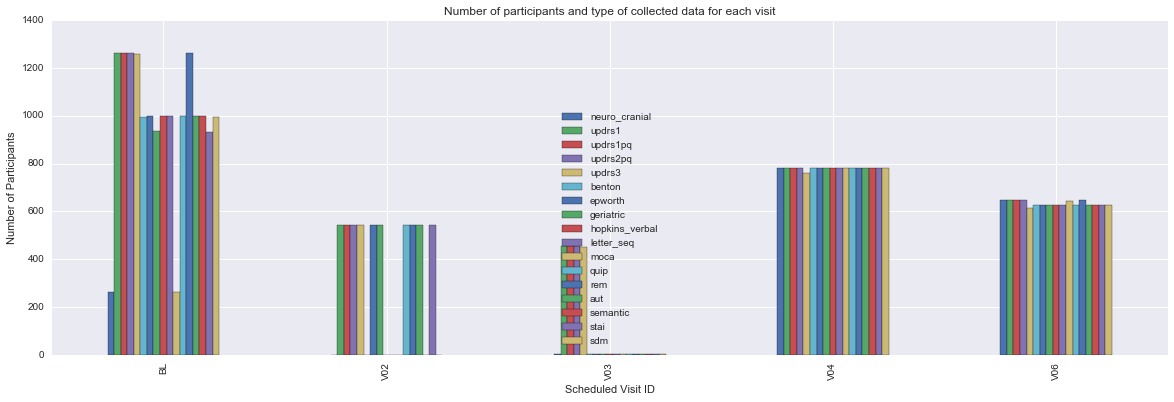

In [25]:
# What data is avaialble, before filtering out participants 
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
plot = dataset_first_noindx.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:datasets_of_interest[0]})

for dataset in datasets_of_interest[1:]:    
    dataset_noindx = eval(dataset).reset_index()
    temp_plot = dataset_noindx.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:dataset})
    
    plot = plot.merge(temp_plot, on='EVENT_ID', how='outer')
    
plot = plot.set_index('EVENT_ID').loc[visits_of_interest]\
    .plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("Scheduled Visit ID");

What data is avaialble:

Let's see what percentage of selected participants are __PD__, __SWEDD__, __Healthy Control__, and how the __gender__ and __birthdate__ looks like:

ENROLL_CAT
GENPD         6
GENUN         7
HC          172
PD          328
PRODROMA     19
REGPD         1
SWEDD        52
dtype: int64

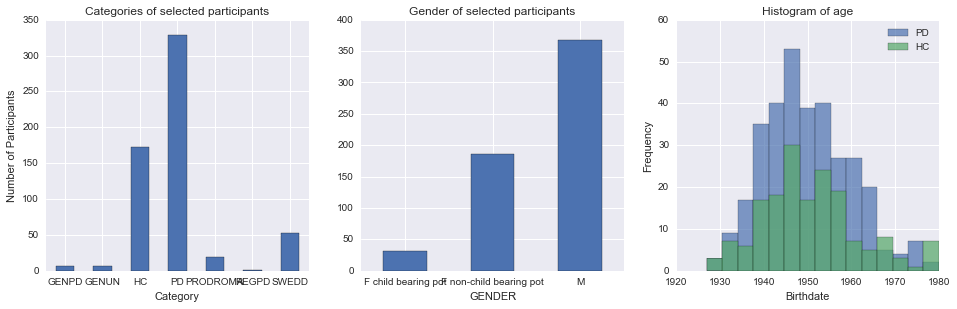

In [26]:
plt.figure(1, figsize=(16, 4.5))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar', title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].GENDER.replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC'].rename(columns={'BIRTHDT':'HC'})
pd_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].rename(columns={'BIRTHDT':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");
data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size()

## 3. Vectorize time-series data into one series

In [27]:
t1 = data_visits['updrs1'].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['updrs1pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t4 = data_visits['updrs3'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['epworth'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t7 = data_visits['benton'].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t8 = data_visits['neuro_cranial'][data_visits['neuro_cranial'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t9 = data_visits['geriatric'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t10 = data_visits['hopkins_verbal'][data_visits['hopkins_verbal'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t11 = data_visits['letter_seq'][data_visits['letter_seq'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t12 = data_visits['quip'][data_visits['quip'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t13 = data_visits['rem'][data_visits['rem'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t14 = data_visits['aut'][data_visits['aut'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t15 = data_visits['semantic'][data_visits['semantic'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t16 = data_visits['stai'][data_visits['stai'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t17 = data_visits['sdm'][data_visits['sdm'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# only PD
# t10 = data_visits['updrs3a'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
# t11 = data_visits['updrs4'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
# t12 = data_visits['schwab'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# chores
# t15 = data_visits['pase_house'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# M = pd.concat([t1, t2, t3, t4, t5, t6 ], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# only looking at updrs3 we can clearly see two classes of PD
# the primary progression was seen by updrs1, updrs1pq, updrs2pq, updrs3, moca, epworth t1-t6
# neuro_cranial is tricky, some questions are not tested/not possible might add unintentional biad for HC and PD, try and remove
# geriatric makes HC to come further in PD
# hopkins_verbal make HC to come out but meaningful 
# quip makes the plot flat in two dimensions 
# aut makes the PD and HC compacted, no interpretation right now
# semantic makes the data to expand further in a dimension 
# stai messes up the results high numbers, need to be normalized

In [28]:
# normalize values based on z-score
data_visits_zs = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_zs[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].mean().mean()) / t16['a_state'].stack().std()
        data_visits_zs[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].mean().mean()) / eval(dataset)[col].stack().std()

#         break
#     break
    
data_visits_zs['t17']

# construct full M
M_zs = pd.concat([data_visits_zs['t1'], data_visits_zs['t2'], data_visits_zs['t3'], data_visits_zs['t4'], 
                  data_visits_zs['t5'], data_visits_zs['t6'] , data_visits_zs['t7'], data_visits_zs['t8'], 
                  data_visits_zs['t9'], data_visits_zs['t10'], data_visits_zs['t11'], data_visits_zs['t12'], 
                  data_visits_zs['t13'], data_visits_zs['t14'], data_visits_zs['t15'],data_visits_zs['t16'],
                  data_visits_zs['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

In [29]:
# normalize values based on min-max
data_visits_minmax = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].min().min()) / (df.max() - df.min())
        data_visits_minmax[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].min().min()) / (eval(dataset)[col].max().max() - eval(dataset)[col].min().min() )

#         break
#     break
    
data_visits_minmax['t17'].min()

# construct full M
M_minmax = pd.concat([data_visits_minmax['t1'], data_visits_minmax['t2'], data_visits_minmax['t3'], data_visits_minmax['t4'], 
                  data_visits_minmax['t5'], data_visits_minmax['t6'] , data_visits_minmax['t7'], data_visits_minmax['t8'], 
                  data_visits_minmax['t9'], data_visits_minmax['t10'], data_visits_minmax['t11'], data_visits_minmax['t12'], 
                  data_visits_minmax['t13'], data_visits_minmax['t14'], data_visits_minmax['t15'],data_visits_minmax['t16'],
                  data_visits_minmax['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')


## 4. Dimension reduction

In [30]:
M_chosen = M_minmax #M_zs #M # choosing Min-Max normalized data withh all features

M_cat = pd.concat([M_chosen, data_visits["info"].ENROLL_CAT], axis=1) # labels of selected subjects

M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3']
M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

# PCA
from sklearn.decomposition import PCA as sklearnPCA
model_pca = sklearnPCA(n_components=3)
M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)

# NMF
from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)

# ICA
model_ICA = decomposition.FastICA(n_components=2)
M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)

## 5. Visualize in 2D

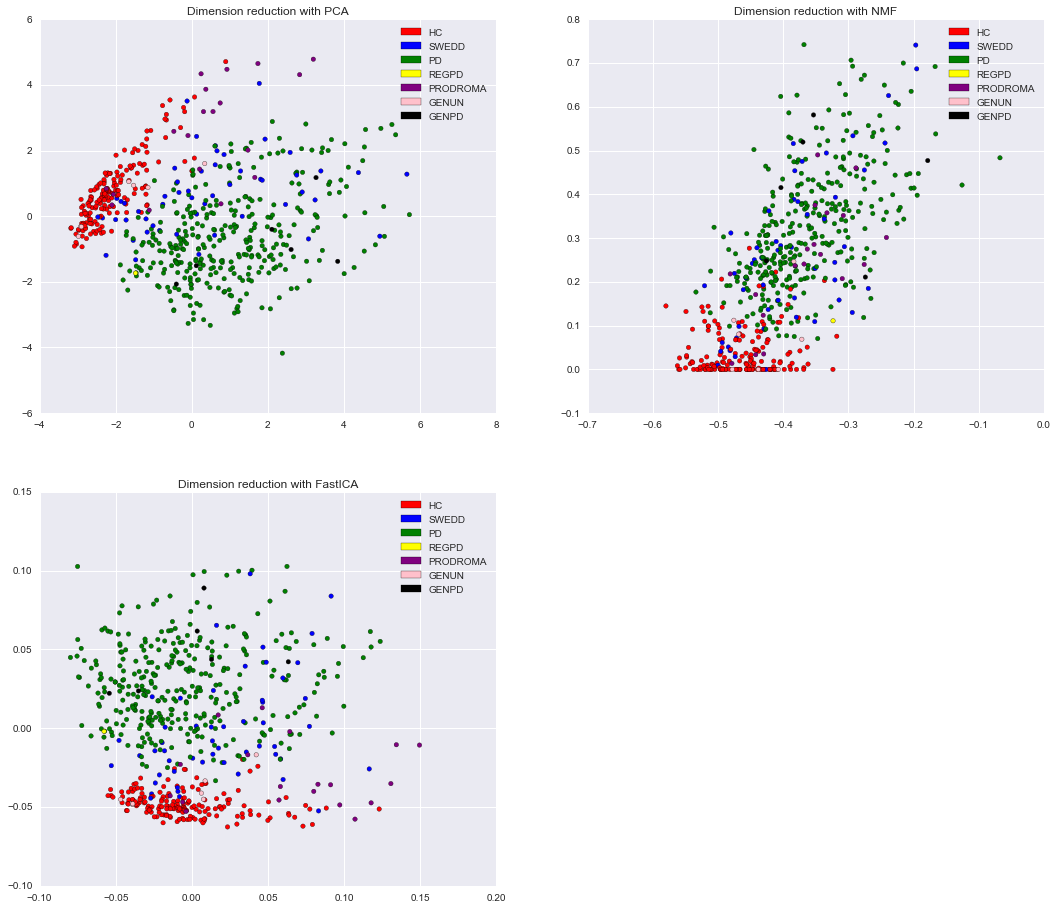

In [31]:
# plot the dimension reduction color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))

## PCA 
plt.subplot(3,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['PCA_1']], M_W[['PCA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with PCA')


## NMF 
plt.subplot(3,2,2)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(-M_W[['NMF_2_1']], M_W[['NMF_2_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with NMF')

## ICA
plt.subplot(3,2,3)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['ICA_1']], M_W[['ICA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with FastICA')


## 6. Labeling using GMM unsupervised

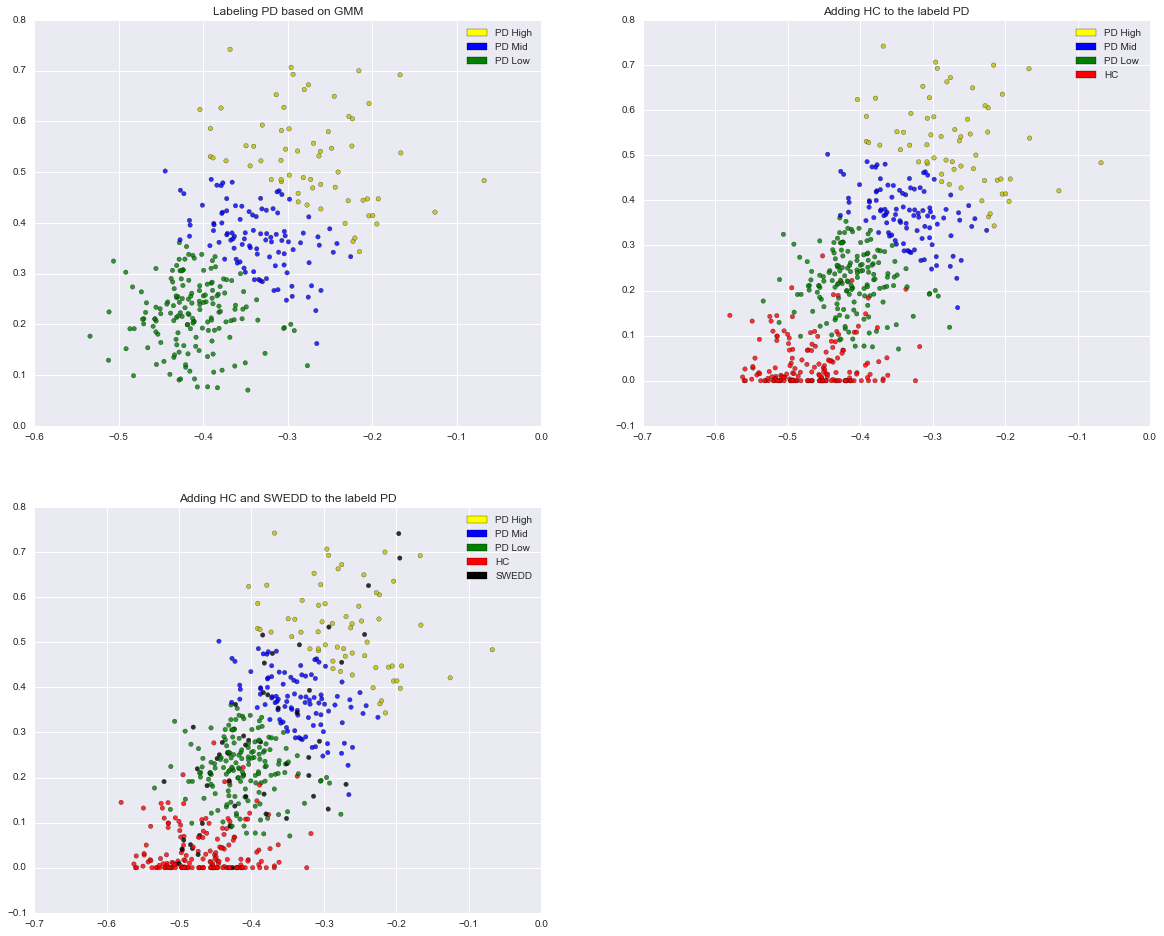

In [41]:
# good guide: http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/
# label HC as HC
M_label_columns = ['GMM']
M_label = pd.DataFrame(index=M_chosen.index, columns=M_label_columns)

M_label[ M_cat.ENROLL_CAT == "HC" ] = 'HC'
M_label[ M_cat.ENROLL_CAT == "SWEDD" ] = 'SWEDD'

# label PD using GMM
M_gmm_chosen = M_W[['NMF_2_1', 'NMF_2_2']] #M_W[['PCA_1', 'PCA_2']]
M_PD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT == "PD" ]
M_PD_HC_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_PD_HC_SWEDD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

from sklearn import mixture
model_gmm = mixture.GMM(n_components=3, covariance_type='diag')
model_gmm.fit(M_PD_gmm_chosen) # print(gmm.means_)

# label the predicted and only keep HC and PDs
M_label.loc[ M_cat.ENROLL_CAT == "PD", 'GMM' ] = model_gmm.predict(M_PD_gmm_chosen)
M_label.replace([1,0,2],['PD_l', 'PD_m', 'PD_h'], inplace=True)
M_label_PD = M_label[ M_cat.ENROLL_CAT.isin(['PD']) ]
M_label_PD_HC = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_label_PD_HC_SWEDD = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

# plot only predicted PD
%matplotlib inline
plt.figure(1, figsize=(20, 16))
plt.subplot(2,2,1)
colors = ['b' if i==0 else 'g' if i==1 else 'y' if i==2 else 'r' for i in model_gmm.predict(M_PD_gmm_chosen)]
ax = plt.scatter(-M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
plt.legend((p1, p2, p3), ('PD High', 'PD Mid', 'PD Low'), loc='best');
plt.title('Labeling PD based on GMM')

# plot predicted PD and HC
plt.subplot(2,2,2)
colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
ax = plt.scatter(-M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD High', 'PD Mid', 'PD Low', 'HC'), loc='best');
plt.title('Adding HC to the labeld PD')

# plot predicted PD with HC and SWEDD
plt.subplot(2,2,3)
colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC_SWEDD['GMM']]
ax = plt.gca()
ax.scatter(-M_PD_HC_SWEDD_gmm_chosen[[0]], M_PD_HC_SWEDD_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5), ('PD High', 'PD Mid', 'PD Low', 'HC', 'SWEDD'), loc='best');
plt.title('Adding HC and SWEDD to the labeld PD')
# plt.show()

## 7. Supervised Classification based on progression

### 7.1 Compare different algorithms

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


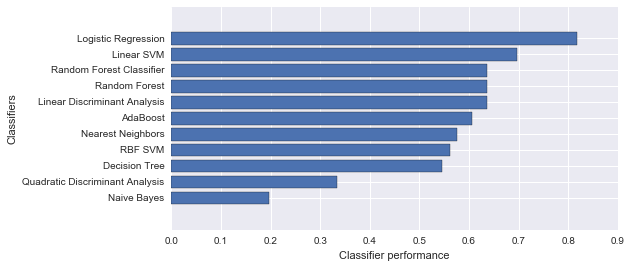

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest Classifier"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 40)]

# data process
X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

### 7.2 Logistic regression

In [34]:
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(accuracy_score(Y_test, lr.predict(X_test)))

# from sklearn.externals import joblib
# joblib.dump(lr, '../data/2016-05-25 data/filename.pkl') 
# clf = joblib.load('filename.pkl') 

0.818181818182


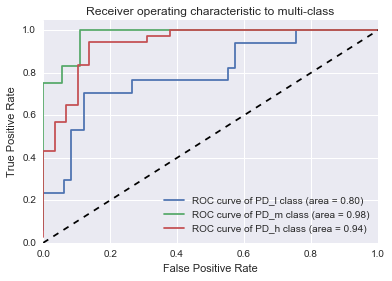

In [37]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = lr.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD_l' if i+2==2 else 'PD_m' if i+2==3 else 'PD_h' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 8. find important features predicting from baseline

In [ ]:
# find important features using L1 to 60
from sklearn.feature_selection import SelectFromModel
func = lr.fit(X_train, Y_train)
model = SelectFromModel(func, prefit=True)
X_new = model.transform(X_train)

# find important features
# ref: http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

imp = model.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

%matplotlib inline
plt.figure(1, figsize=(8, 150))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()